# Random Walks 
## Generate sequences
![Random walk](random_walk.png)

In [51]:
import numpy as np
np.random.seed(1)

In [2]:
def generate_sequence():
    walk_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
    sequence_num = [3]
    sequence_states = ['D']
    curr_pos = 3
    while curr_pos != 0 and curr_pos !=6:
        if np.random.rand() >0.5:
            curr_pos +=1
        else:
            curr_pos -=1
        sequence_num.append(curr_pos)
        sequence_states.append(walk_dict[curr_pos])
    return sequence_states,sequence_num
        
#test 
generate_sequence()

(['D', 'E', 'F', 'G'], [3, 4, 5, 6])

## TD(Lmada)

In [3]:
def x(curr_pos,n):
    xt = np.zeros(n)
    xt[curr_pos]=1
    return xt
def dw(seq,w,lm,alpha):
    n = len(w)
    et = np.zeros(n)
    dw = np.zeros(n)
    for t in range(0,len(seq)-1): #leave the last w unchanged (terminating states)
        P_t1 = np.dot(w,x(seq[t+1],n))
        P_t = np.dot(w,x(seq[t],n))
        et = x(seq[t],n) + lm*et
        dw += alpha*(P_t1-P_t)*et
    
    return dw        

In [4]:
def error_rms(w):
    w_true = np.array([0,1/6,1/3,1/2,2/3,5/6,1.0])
    return np.sqrt(np.mean((w-w_true)**2))
#test 
w = np.array([0,0.1,0.1,0.1,0.1,0.1,1.0])
error_rms(w)

0.3923878871324318

In [5]:
x(3,7)

array([0., 0., 0., 1., 0., 0., 0.])

## Test TD($\lambda$)

In [6]:
seqs = [generate_sequence()[1] for i in range(100)]
for i in range(1000):
    w = np.array([0,0.2,0.2,0.2,0.2,0.2,1])
    for seq in seqs:
        w += dw(seq,w, 0.4, 0.2)
w,error_rms(w)

(array([0.        , 0.08902726, 0.25689709, 0.42889274, 0.51276961,
        0.616238  , 1.        ]),
 0.11195745930442101)

## Experiement 1

In [39]:
def experiment_1(epsilon = 1e-3):
    lms = [0,0.1,0.3,0.5,0.7,0.9,1.0]
    alpha = 0.02
    datasets = [[generate_sequence()[1] for i in range(10)] for j in range(100)]
    errors_lms = np.zeros(len(lms))
    for j,lm in enumerate(lms):
        #print("iteration for lamda: ",lm)    
        errors_datasets = np.zeros(len(datasets))
        for m,dataset in enumerate(datasets):
            #print("dataset {} started ".format(m))
            w = np.array([0,0.5,0.5,0.5,0.5,0.5,1]) 
            while True:
                dw_sum = 0
                for seq in dataset:
                    change =dw(seq,w,lm,alpha)
                    dw_sum += change
                if max(abs(dw_sum)) < epsilon:
                    break
                w += dw_sum
            errors_datasets[m] = error_rms(w)
        errors_lms[j] = np.mean(errors_datasets)
    return errors_lms, lms
exp1_errors, exp1_lm =experiment_1()

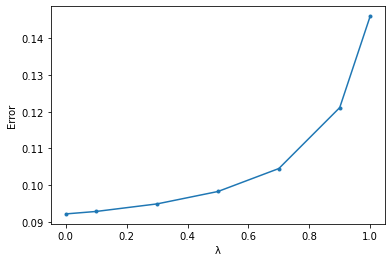

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline
# plt.plot(np.array([0,0.1,0.3,0.5,0.7,0.9,1.0]),np.array([0.15546862, 0.1557709 , 0.15731898, 0.16078645, 0.16773988,
#        0.18536453, 0.21426004]),'-o')
plt.plot(exp1_lm,exp1_errors,'.-')
plt.xlabel('λ')
plt.ylabel('Error')
plt.savefig("Figure3.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Experiement 2

In [66]:
def experiment_2(epsilon = 1e-3):
    lms = [0,0.3,0.8,1.0]
    alphas = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
    datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros((len(lms),len(alphas)))
    for j,lm in enumerate(lms):
        print("iteration for lamda: ",lm)
        for n,alpha in enumerate(alphas):
            print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1])
                for seq in dataset:
                    w += dw(seq,w,lm,alpha)
                errors_datasets[m] = error_rms(w)
                print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            errors_lms[j,n] = mean_error
    
    return errors_lms, alphas
exp2_errors, exp2_alpha =experiment_2()

iteration for lamda:  0
iteration for alpha:  0.0
dataset 0 started 
dataset error:  0.19920476822239896
dataset 1 started 
dataset error:  0.19920476822239896
dataset 2 started 
dataset error:  0.19920476822239896
dataset 3 started 
dataset error:  0.19920476822239896
dataset 4 started 
dataset error:  0.19920476822239896
dataset 5 started 
dataset error:  0.19920476822239896
dataset 6 started 
dataset error:  0.19920476822239896
dataset 7 started 
dataset error:  0.19920476822239896
dataset 8 started 
dataset error:  0.19920476822239896
dataset 9 started 
dataset error:  0.19920476822239896
dataset 10 started 
dataset error:  0.19920476822239896
dataset 11 started 
dataset error:  0.19920476822239896
dataset 12 started 
dataset error:  0.19920476822239896
dataset 13 started 
dataset error:  0.19920476822239896
dataset 14 started 
dataset error:  0.19920476822239896
dataset 15 started 
dataset error:  0.19920476822239896
dataset 16 started 
dataset error:  0.19920476822239896
dataset 

dataset error:  0.15103539491083876
dataset 89 started 
dataset error:  0.14510060891102147
dataset 90 started 
dataset error:  0.14474095634769188
dataset 91 started 
dataset error:  0.14860168919012573
dataset 92 started 
dataset error:  0.147515428302607
dataset 93 started 
dataset error:  0.14476303762871262
dataset 94 started 
dataset error:  0.14442183308979245
dataset 95 started 
dataset error:  0.14822764921587164
dataset 96 started 
dataset error:  0.15278188243894394
dataset 97 started 
dataset error:  0.15614269775910772
dataset 98 started 
dataset error:  0.1474298595674007
dataset 99 started 
dataset error:  0.15033763917917647
iteration for alpha:  0.15
dataset 0 started 
dataset error:  0.123923450313407
dataset 1 started 
dataset error:  0.12244548674634484
dataset 2 started 
dataset error:  0.13276812930093507
dataset 3 started 
dataset error:  0.12191079081522566
dataset 4 started 
dataset error:  0.12406301279701532
dataset 5 started 
dataset error:  0.13238041682426

dataset error:  0.09340503338979145
dataset 51 started 
dataset error:  0.09016801171868873
dataset 52 started 
dataset error:  0.09314479963227529
dataset 53 started 
dataset error:  0.12140468323260369
dataset 54 started 
dataset error:  0.16543476916689903
dataset 55 started 
dataset error:  0.14689215521580157
dataset 56 started 
dataset error:  0.07909469679351981
dataset 57 started 
dataset error:  0.10347554864003691
dataset 58 started 
dataset error:  0.08902835387898954
dataset 59 started 
dataset error:  0.1323873659353044
dataset 60 started 
dataset error:  0.14022161092815175
dataset 61 started 
dataset error:  0.08125064090387489
dataset 62 started 
dataset error:  0.1451546844163873
dataset 63 started 
dataset error:  0.07681227541817072
dataset 64 started 
dataset error:  0.11398110933297885
dataset 65 started 
dataset error:  0.10761307164064238
dataset 66 started 
dataset error:  0.15682229487539034
dataset 67 started 
dataset error:  0.10486838721426141
dataset 68 sta

dataset error:  0.1460283947165483
dataset 10 started 
dataset error:  0.09529380465879828
dataset 11 started 
dataset error:  0.16040627783305106
dataset 12 started 
dataset error:  0.09862804907069828
dataset 13 started 
dataset error:  0.09522598018181436
dataset 14 started 
dataset error:  0.040684180459762735
dataset 15 started 
dataset error:  0.31004119337162533
dataset 16 started 
dataset error:  0.17157048060745478
dataset 17 started 
dataset error:  0.10908077682623953
dataset 18 started 
dataset error:  0.22548045014330043
dataset 19 started 
dataset error:  0.06548545943051323
dataset 20 started 
dataset error:  0.09358886597731932
dataset 21 started 
dataset error:  0.23812554437216454
dataset 22 started 
dataset error:  0.0672872298552058
dataset 23 started 
dataset error:  0.06079582274706105
dataset 24 started 
dataset error:  0.06565464236055259
dataset 25 started 
dataset error:  0.12623054745627585
dataset 26 started 
dataset error:  0.2788543535639838
dataset 27 sta

dataset error:  0.9949961613549627
dataset 98 started 
dataset error:  0.3523236359434951
dataset 99 started 
dataset error:  0.17256131013053957
iteration for alpha:  0.55
dataset 0 started 
dataset error:  0.26176239113165434
dataset 1 started 
dataset error:  0.1284581861785932
dataset 2 started 
dataset error:  0.5039572518348839
dataset 3 started 
dataset error:  0.16067134358477425
dataset 4 started 
dataset error:  0.07057739915672541
dataset 5 started 
dataset error:  0.11058187297316892
dataset 6 started 
dataset error:  0.07374471220918008
dataset 7 started 
dataset error:  0.07408835101691094
dataset 8 started 
dataset error:  0.5424691432521603
dataset 9 started 
dataset error:  0.4937212335809706
dataset 10 started 
dataset error:  0.17813528259446504
dataset 11 started 
dataset error:  0.23062747869041722
dataset 12 started 
dataset error:  0.1732048870895575
dataset 13 started 
dataset error:  0.10378757798099428
dataset 14 started 
dataset error:  0.07086714656985019
da

dataset error:  0.19920476822239896
dataset 77 started 
dataset error:  0.19920476822239896
dataset 78 started 
dataset error:  0.19920476822239896
dataset 79 started 
dataset error:  0.19920476822239896
dataset 80 started 
dataset error:  0.19920476822239896
dataset 81 started 
dataset error:  0.19920476822239896
dataset 82 started 
dataset error:  0.19920476822239896
dataset 83 started 
dataset error:  0.19920476822239896
dataset 84 started 
dataset error:  0.19920476822239896
dataset 85 started 
dataset error:  0.19920476822239896
dataset 86 started 
dataset error:  0.19920476822239896
dataset 87 started 
dataset error:  0.19920476822239896
dataset 88 started 
dataset error:  0.19920476822239896
dataset 89 started 
dataset error:  0.19920476822239896
dataset 90 started 
dataset error:  0.19920476822239896
dataset 91 started 
dataset error:  0.19920476822239896
dataset 92 started 
dataset error:  0.19920476822239896
dataset 93 started 
dataset error:  0.19920476822239896
dataset 94 s

dataset error:  0.1188379810964915
dataset 93 started 
dataset error:  0.11293977795258117
dataset 94 started 
dataset error:  0.11147854757174017
dataset 95 started 
dataset error:  0.12189935815535487
dataset 96 started 
dataset error:  0.13100522447230548
dataset 97 started 
dataset error:  0.13833360504428469
dataset 98 started 
dataset error:  0.12038742226533564
dataset 99 started 
dataset error:  0.12885658889635723
iteration for alpha:  0.2
dataset 0 started 
dataset error:  0.08807708087610013
dataset 1 started 
dataset error:  0.0805432411935446
dataset 2 started 
dataset error:  0.12148933621083449
dataset 3 started 
dataset error:  0.08397730350623192
dataset 4 started 
dataset error:  0.09934887609409927
dataset 5 started 
dataset error:  0.11357999761167638
dataset 6 started 
dataset error:  0.08896134832344227
dataset 7 started 
dataset error:  0.0947956456037979
dataset 8 started 
dataset error:  0.13987103418740737
dataset 9 started 
dataset error:  0.09703589611006919

dataset error:  0.19310697252110354
dataset 75 started 
dataset error:  0.1422950691432996
dataset 76 started 
dataset error:  0.08915296672090364
dataset 77 started 
dataset error:  0.11530396055335447
dataset 78 started 
dataset error:  0.10345926210349152
dataset 79 started 
dataset error:  0.105730357045366
dataset 80 started 
dataset error:  0.07225908769426714
dataset 81 started 
dataset error:  0.049093614142821554
dataset 82 started 
dataset error:  0.18080621746861666
dataset 83 started 
dataset error:  0.10197528901588884
dataset 84 started 
dataset error:  0.10240160432326238
dataset 85 started 
dataset error:  0.08345524533176861
dataset 86 started 
dataset error:  0.07674821251945449
dataset 87 started 
dataset error:  0.11281223274822556
dataset 88 started 
dataset error:  0.11762010121549328
dataset 89 started 
dataset error:  0.062220602956204164
dataset 90 started 
dataset error:  0.04605849130753737
dataset 91 started 
dataset error:  0.10375915455329862
dataset 92 st

dataset error:  0.12168093974254526
dataset 79 started 
dataset error:  0.13742611337102556
dataset 80 started 
dataset error:  0.09354112857331812
dataset 81 started 
dataset error:  0.08034741053161021
dataset 82 started 
dataset error:  0.2326856162044758
dataset 83 started 
dataset error:  0.1337950790954147
dataset 84 started 
dataset error:  0.13548662469700784
dataset 85 started 
dataset error:  0.09996237671651986
dataset 86 started 
dataset error:  0.11564616477865797
dataset 87 started 
dataset error:  0.15755920240270038
dataset 88 started 
dataset error:  0.13292026602506013
dataset 89 started 
dataset error:  0.07400232446604157
dataset 90 started 
dataset error:  0.058551655019913
dataset 91 started 
dataset error:  0.1303477930569114
dataset 92 started 
dataset error:  0.10055416133206008
dataset 93 started 
dataset error:  0.058839456802142066
dataset 94 started 
dataset error:  0.10924686797863385
dataset 95 started 
dataset error:  0.11193328019205807
dataset 96 start

dataset error:  0.08531366773908397
dataset 94 started 
dataset error:  0.21108020062524538
dataset 95 started 
dataset error:  0.16327899193230247
dataset 96 started 
dataset error:  0.15285053141612384
dataset 97 started 
dataset error:  1.3145686667281165
dataset 98 started 
dataset error:  0.28562829592920763
dataset 99 started 
dataset error:  0.23562546737403847
iteration for lamda:  0.8
iteration for alpha:  0.0
dataset 0 started 
dataset error:  0.19920476822239896
dataset 1 started 
dataset error:  0.19920476822239896
dataset 2 started 
dataset error:  0.19920476822239896
dataset 3 started 
dataset error:  0.19920476822239896
dataset 4 started 
dataset error:  0.19920476822239896
dataset 5 started 
dataset error:  0.19920476822239896
dataset 6 started 
dataset error:  0.19920476822239896
dataset 7 started 
dataset error:  0.19920476822239896
dataset 8 started 
dataset error:  0.19920476822239896
dataset 9 started 
dataset error:  0.19920476822239896
dataset 10 started 
dataset

dataset error:  0.14139215604553262
dataset 67 started 
dataset error:  0.14036843721023937
dataset 68 started 
dataset error:  0.11960128825110809
dataset 69 started 
dataset error:  0.1078359850070012
dataset 70 started 
dataset error:  0.14499547378756317
dataset 71 started 
dataset error:  0.18983850189251864
dataset 72 started 
dataset error:  0.12800111955551052
dataset 73 started 
dataset error:  0.11264123662013821
dataset 74 started 
dataset error:  0.1833400778226276
dataset 75 started 
dataset error:  0.1610215167738651
dataset 76 started 
dataset error:  0.13203549558922728
dataset 77 started 
dataset error:  0.11085728730491
dataset 78 started 
dataset error:  0.11778610944893893
dataset 79 started 
dataset error:  0.14556433406133237
dataset 80 started 
dataset error:  0.1308862684494959
dataset 81 started 
dataset error:  0.11299900269651898
dataset 82 started 
dataset error:  0.19005485235222394
dataset 83 started 
dataset error:  0.13286024731862495
dataset 84 started 

dataset error:  0.1261808354577424
dataset 73 started 
dataset error:  0.08335630180749287
dataset 74 started 
dataset error:  0.29048536358198546
dataset 75 started 
dataset error:  0.24043723388033533
dataset 76 started 
dataset error:  0.1396965464589298
dataset 77 started 
dataset error:  0.1459523776132783
dataset 78 started 
dataset error:  0.10688555671208012
dataset 79 started 
dataset error:  0.16570004130101643
dataset 80 started 
dataset error:  0.10643569088785232
dataset 81 started 
dataset error:  0.08451476347097676
dataset 82 started 
dataset error:  0.2836471389582062
dataset 83 started 
dataset error:  0.16041631113876578
dataset 84 started 
dataset error:  0.14365564406882306
dataset 85 started 
dataset error:  0.15958789802630954
dataset 86 started 
dataset error:  0.12635510745157066
dataset 87 started 
dataset error:  0.13317690246513142
dataset 88 started 
dataset error:  0.15974964306530834
dataset 89 started 
dataset error:  0.06682532726481555
dataset 90 start

dataset error:  0.23545823116926617
dataset 58 started 
dataset error:  0.2505634449627595
dataset 59 started 
dataset error:  0.32316033179093184
dataset 60 started 
dataset error:  0.716041134643042
dataset 61 started 
dataset error:  0.15117408901480722
dataset 62 started 
dataset error:  0.27000177704245265
dataset 63 started 
dataset error:  0.08275552172032112
dataset 64 started 
dataset error:  0.221447044041491
dataset 65 started 
dataset error:  0.2415198255230016
dataset 66 started 
dataset error:  0.4423963458688748
dataset 67 started 
dataset error:  0.12278753082704756
dataset 68 started 
dataset error:  0.15446164377350288
dataset 69 started 
dataset error:  0.1421559711691363
dataset 70 started 
dataset error:  0.250040013009887
dataset 71 started 
dataset error:  0.35943438894145835
dataset 72 started 
dataset error:  0.19472715085284942
dataset 73 started 
dataset error:  0.12735367749921905
dataset 74 started 
dataset error:  0.37674303213058724
dataset 75 started 
da

dataset error:  0.5604712921773117
dataset 53 started 
dataset error:  0.36499979680392053
dataset 54 started 
dataset error:  0.484161775284938
dataset 55 started 
dataset error:  0.3839482205969445
dataset 56 started 
dataset error:  0.17277623118954827
dataset 57 started 
dataset error:  0.2751409918402843
dataset 58 started 
dataset error:  0.293193941844497
dataset 59 started 
dataset error:  0.8045171685064768
dataset 60 started 
dataset error:  2.405314198548463
dataset 61 started 
dataset error:  0.25713904939906485
dataset 62 started 
dataset error:  0.29214691858366265
dataset 63 started 
dataset error:  0.132385192895771
dataset 64 started 
dataset error:  0.24455334781235474
dataset 65 started 
dataset error:  0.29562549130837773
dataset 66 started 
dataset error:  1.0015751761024916
dataset 67 started 
dataset error:  0.13404230659283725
dataset 68 started 
dataset error:  0.2128639945699015
dataset 69 started 
dataset error:  0.481029812921599
dataset 70 started 
dataset 

dataset error:  0.17993187538914573
dataset 34 started 
dataset error:  0.17386867659078095
dataset 35 started 
dataset error:  0.1530480309425666
dataset 36 started 
dataset error:  0.16028481975711234
dataset 37 started 
dataset error:  0.20214245351030774
dataset 38 started 
dataset error:  0.16883429706911354
dataset 39 started 
dataset error:  0.2175439633886149
dataset 40 started 
dataset error:  0.169328101114914
dataset 41 started 
dataset error:  0.24807627423148507
dataset 42 started 
dataset error:  0.17175288705662697
dataset 43 started 
dataset error:  0.1724053903947112
dataset 44 started 
dataset error:  0.1058936208945362
dataset 45 started 
dataset error:  0.1754760594797109
dataset 46 started 
dataset error:  0.16144998570208877
dataset 47 started 
dataset error:  0.1469213256072091
dataset 48 started 
dataset error:  0.20655212153629326
dataset 49 started 
dataset error:  0.1491374306519104
dataset 50 started 
dataset error:  0.18424355088165828
dataset 51 started 
d

dataset 24 started 
dataset error:  0.16901168882278575
dataset 25 started 
dataset error:  0.3650914964598622
dataset 26 started 
dataset error:  0.4421544598318628
dataset 27 started 
dataset error:  0.14919472615046123
dataset 28 started 
dataset error:  0.2165911356113099
dataset 29 started 
dataset error:  0.08877826131739507
dataset 30 started 
dataset error:  1.0857347456585142
dataset 31 started 
dataset error:  0.3108125100544526
dataset 32 started 
dataset error:  0.3033591447312302
dataset 33 started 
dataset error:  0.21639329931239
dataset 34 started 
dataset error:  0.25391567274095556
dataset 35 started 
dataset error:  0.1374205267354698
dataset 36 started 
dataset error:  0.08714826833056337
dataset 37 started 
dataset error:  0.2069273744846513
dataset 38 started 
dataset error:  0.2418045437098529
dataset 39 started 
dataset error:  0.35175292165391253
dataset 40 started 
dataset error:  0.1821238154105128
dataset 41 started 
dataset error:  0.3884183638769225
datase

dataset error:  0.7341616816391516
dataset 45 started 
dataset error:  0.4529160662116878
dataset 46 started 
dataset error:  0.22595426195492102
dataset 47 started 
dataset error:  0.2241923970976577
dataset 48 started 
dataset error:  0.26361889912139924
dataset 49 started 
dataset error:  0.16826479428436744
dataset 50 started 
dataset error:  0.3693169333710944
dataset 51 started 
dataset error:  0.6845209678853725
dataset 52 started 
dataset error:  0.34920128791593685
dataset 53 started 
dataset error:  1.1246427840550257
dataset 54 started 
dataset error:  0.4431337886400961
dataset 55 started 
dataset error:  0.4000907031809232
dataset 56 started 
dataset error:  0.16071787218427425
dataset 57 started 
dataset error:  0.33622835592497985
dataset 58 started 
dataset error:  0.3708755172126641
dataset 59 started 
dataset error:  1.3437781814516705
dataset 60 started 
dataset error:  1.4609654940195793
dataset 61 started 
dataset error:  0.2446004947405195
dataset 62 started 
data

dataset error:  0.38129228232878265
dataset 33 started 
dataset error:  0.6089487723863749
dataset 34 started 
dataset error:  0.3673154433462265
dataset 35 started 
dataset error:  0.1419552383060931
dataset 36 started 
dataset error:  0.11915917392361666
dataset 37 started 
dataset error:  0.19920476822239896
dataset 38 started 
dataset error:  0.41116154908313646
dataset 39 started 
dataset error:  0.3972845031441474
dataset 40 started 
dataset error:  0.7662346738413927
dataset 41 started 
dataset error:  0.58471681710072
dataset 42 started 
dataset error:  0.44862986547977035
dataset 43 started 
dataset error:  0.3619590928829319
dataset 44 started 
dataset error:  1.2956208675919365
dataset 45 started 
dataset error:  0.24400678374970033
dataset 46 started 
dataset error:  0.2852178226359748
dataset 47 started 
dataset error:  0.358862427767929
dataset 48 started 
dataset error:  0.3242818683780056
dataset 49 started 
dataset error:  1.1246141313554816
dataset 50 started 
dataset

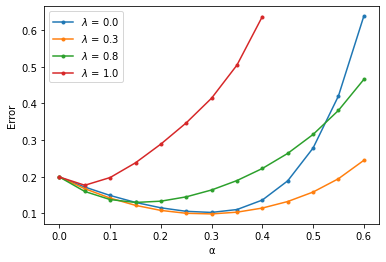

In [78]:
lms = np.array([0,0.3,0.8,1.0])
for i,alpha in enumerate(lms):
    if lms[i]== 1.0:
        plt.plot(exp2_alpha[:9],exp2_errors[i,:9],'.-',label="$\lambda$ = {}".format(lms[i]))
    else:
        plt.plot(exp2_alpha,exp2_errors[i],'.-',label="$\lambda$ = {}".format(lms[i]))
plt.legend()
plt.xlabel('α')
plt.ylabel('Error')
plt.savefig("Figure4.pdf", format="pdf", bbox_inches="tight")


In [65]:
exp2_errors[0]

array([0.19920477, 0.18222438, 0.16695014, 0.15327579, 0.1412817 ,
       0.1312025 , 0.12343937, 0.1186048 , 0.11754776, 0.12124763,
       0.1305827 , 0.14616215, 0.16830249])

In [76]:
def experiment_3(epsilon = 1e-4):
    lms = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    alphas = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
    datasets = [[generate_sequence()[1] for i in range(5)] for j in range(100)]
    
    errors_lms = np.zeros(len(lms))
    for j,lm in enumerate(lms):
        #print("iteration for lamda: ",lm)
        min_error = float('inf') #to find min alpha 
        for alpha in alphas:
            #print("iteration for alpha: ",alpha)
            errors_datasets = np.zeros(len(datasets))
            for m,dataset in enumerate(datasets):
                #print("dataset {} started ".format(m))
                w = np.array([0,0.5,0.5,0.5,0.5,0.5,1]) 
                for seq in dataset:
                    w += dw(seq,w,lm,alpha)
                errors_datasets[m] = error_rms(w)
                #print("dataset error: ",errors_datasets[m])
            mean_error = np.mean(errors_datasets)
            if mean_error < min_error:
                min_error = mean_error
        errors_lms[j] = min_error
    
    return errors_lms, lms
exp3_errors, exp3_lm =experiment_3()

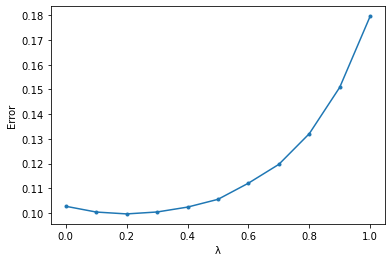

In [77]:
plt.plot(exp3_lm,exp3_errors,'.-')
plt.xlabel('λ')
plt.ylabel('Error')
plt.savefig("Figure5.pdf", format="pdf", bbox_inches="tight")
plt.show()